# p50 analysis

In [1]:
import os.path as op

from funcs.p50_analysis import *
from funcs.plots import P50GlobalFigure, Fig4p50

from scripts.utils import *
from scripts.stats import *

#### Set paths and parameters

In [2]:
# Figure output path
data_path = get_path("dataframes")
fig_dir = get_path("figures")

#### Load data

In [3]:
random_audiograms = pd.read_pickle(op.join(data_path, "global_random_audiograms.pkl"))
sigmoid_data = pd.read_pickle(op.join(data_path, "sigmoid_data.pkl"))

process = P50DataAnalyzer(sigmoid_data)

#### Plot mean sigmoids & barplot of p50 values

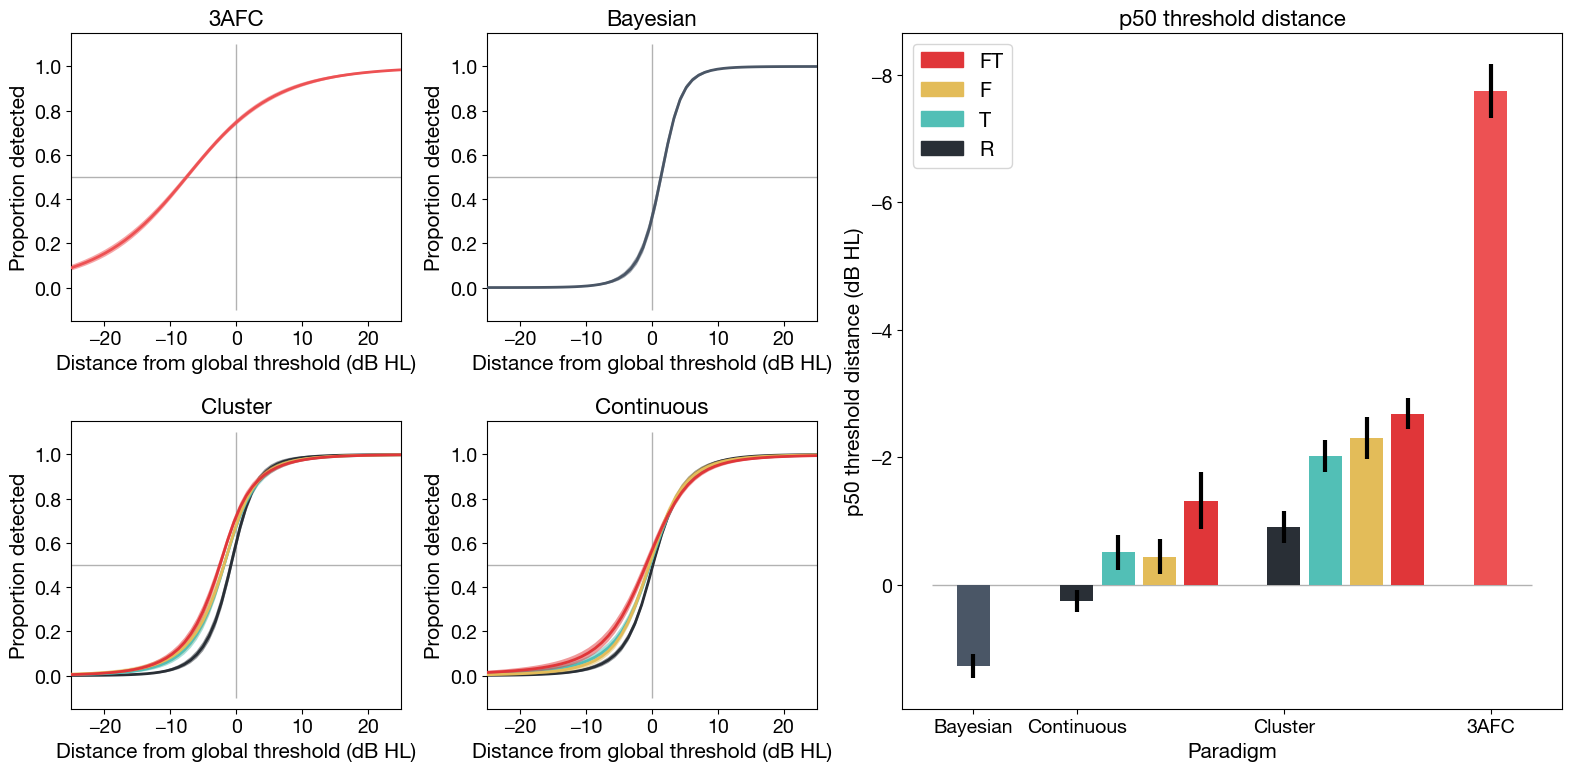

In [4]:
figure = P50GlobalFigure(sigmoid_data)
figure.plot_sigmoids_and_barplot()

### STATS - Effect of the experimental paradigm

#### Filter data

Filter the p50 data from the 3-AFC task, Randomized task, and the random conditions of the Continuous and Cluster tasks.

Print some descriptive stats and run one-way ANOVA.

In [5]:
paradigms_data, paradigms_aov, paradigms_posthoc = process.p50_stats_pipeline(var='distance_p50', factor='paradigm', filter_on='pred', conditions=['Bayesian', '3AFC', 'none'])


Number of participants with at least one missing p50 value (prevent running repeated measures anova): 0

Remaining participants after removal of problematic: N = 28 

------------------------ 3AFC ------------------------
Mean: -7.744 dB  |  SD: 2.224 dB  |  SEM: 0.42 dB
------------------------ Bayesian ------------------------
Mean: 1.273 dB  |  SD: 0.994 dB  |  SEM: 0.188 dB
------------------------ Cluster/R ------------------------
Mean: -0.911 dB  |  SD: 1.338 dB  |  SEM: 0.253 dB
------------------------ Continuous/R ------------------------
Mean: 0.256 dB  |  SD: 0.889 dB  |  SEM: 0.168 dB

One-way ANOVA on the distance_p50 (factor: paradigm):
paradigm: F(3, 81) = 191.83, p = <0.001     *

Post-hoc tests (paired t-tests):
paradigm / 3AFC vs Bayesian: T(27) = -19.54, p = <0.001 (fdr_bh: <0.001)     *
paradigm / 3AFC vs Cluster: T(27) = -12.78, p = <0.001 (fdr_bh: <0.001)     *
paradigm / 3AFC vs Continuous: T(27) = -17.65, p = <0.001 (fdr_bh: <0.001)     *
paradigm / Bayesian v

### STATS - Effect of predictability

#### Why not both?

Remove participants with problematic p50 values in any pred condition of either task, and count the remaining participants.

In [6]:
_ = process.p50_stats_pipeline(var='distance_p50', factor='pred', filter_on='paradigm', conditions=['Continuous', 'Cluster'])


Number of participants with at least one missing p50 value (prevent running repeated measures anova): 0

Remaining participants after removal of problematic: N = 28 

------------------------ Cluster/F ------------------------
Mean: -2.3 dB  |  SD: 1.754 dB  |  SEM: 0.332 dB
------------------------ Cluster/FT ------------------------
Mean: -2.686 dB  |  SD: 1.294 dB  |  SEM: 0.245 dB
------------------------ Cluster/R ------------------------
Mean: -0.911 dB  |  SD: 1.338 dB  |  SEM: 0.253 dB
------------------------ Cluster/T ------------------------
Mean: -2.017 dB  |  SD: 1.332 dB  |  SEM: 0.252 dB

------------------------ Continuous/F ------------------------
Mean: -0.444 dB  |  SD: 1.458 dB  |  SEM: 0.275 dB
------------------------ Continuous/FT ------------------------
Mean: -1.32 dB  |  SD: 2.391 dB  |  SEM: 0.452 dB
------------------------ Continuous/R ------------------------
Mean: 0.256 dB  |  SD: 0.889 dB  |  SEM: 0.168 dB
------------------------ Continuous/T ---------

#### Continuous stats

In [7]:
paradigm = 'Continuous'

continuous_data, continuous_aov, continuous_posthocs = process.p50_stats_pipeline(var='distance_p50', factor='pred', filter_on='paradigm', conditions=[paradigm])


Number of participants with at least one missing p50 value (prevent running repeated measures anova): 0

Remaining participants after removal of problematic: N = 28 

------------------------ Continuous/F ------------------------
Mean: -0.444 dB  |  SD: 1.458 dB  |  SEM: 0.275 dB
------------------------ Continuous/FT ------------------------
Mean: -1.32 dB  |  SD: 2.391 dB  |  SEM: 0.452 dB
------------------------ Continuous/R ------------------------
Mean: 0.256 dB  |  SD: 0.889 dB  |  SEM: 0.168 dB
------------------------ Continuous/T ------------------------
Mean: -0.511 dB  |  SD: 1.468 dB  |  SEM: 0.277 dB

One-way ANOVA on the distance_p50 (factor: pred):
pred: F(3, 81) = 6.92, p = <0.001     *

Post-hoc tests (paired t-tests):
pred / F vs FT: T(27) = 2.12, p = 0.043 (fdr_bh: 0.052)
pred / F vs R: T(27) = -3.22, p = 0.003 (fdr_bh: 0.010)     *
pred / F vs T: T(27) = 0.20, p = 0.842 (fdr_bh: 0.842)
pred / FT vs R: T(27) = -3.60, p = 0.001 (fdr_bh: 0.008)     *
pred / FT vs T: 

#### Cluster stats

In [8]:
paradigm = 'Cluster'

cluster_data, cluster_aov, cluster_posthocs = process.p50_stats_pipeline(var='distance_p50', factor='pred', filter_on='paradigm', conditions=[paradigm])


Number of participants with at least one missing p50 value (prevent running repeated measures anova): 0

Remaining participants after removal of problematic: N = 28 

------------------------ Cluster/F ------------------------
Mean: -2.3 dB  |  SD: 1.754 dB  |  SEM: 0.332 dB
------------------------ Cluster/FT ------------------------
Mean: -2.686 dB  |  SD: 1.294 dB  |  SEM: 0.245 dB
------------------------ Cluster/R ------------------------
Mean: -0.911 dB  |  SD: 1.338 dB  |  SEM: 0.253 dB
------------------------ Cluster/T ------------------------
Mean: -2.017 dB  |  SD: 1.332 dB  |  SEM: 0.252 dB

One-way ANOVA on the distance_p50 (factor: pred):
pred: F(3, 81) = 14.62, p = <0.001     *

Post-hoc tests (paired t-tests):
pred / F vs FT: T(27) = 1.33, p = 0.195 (fdr_bh: 0.234)
pred / F vs R: T(27) = -5.29, p = <0.001 (fdr_bh: <0.001)     *
pred / F vs T: T(27) = -0.83, p = 0.416 (fdr_bh: 0.416)
pred / FT vs R: T(27) = -6.29, p = <0.001 (fdr_bh: <0.001)     *
pred / FT vs T: T(27) 

### Fig4A - p50 barplot

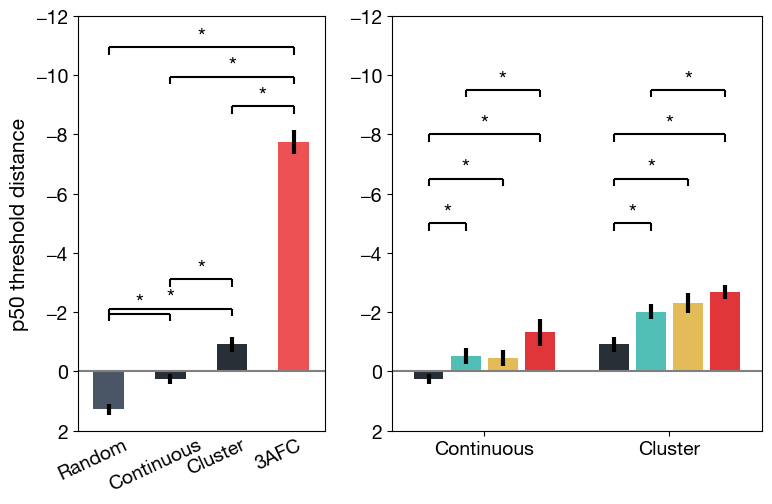

In [9]:
fig = Fig4p50().p50_barplot('distance_p50', paradigms_data, continuous_data, cluster_data, paradigms_posthoc, continuous_posthocs, cluster_posthocs)
fig.savefig(op.join(fig_dir, "Fig4A-p50_barplot.svg"))

In [10]:
# Old code for 2-way ANOVA with Predictability in Time and Frequency as factors
#TODO: decide whether to definitely remove this or reuse it. Probably throw it in the trash and burn it with fire

'''
aov_results = pg.rm_anova(data=paradigm_data, dv='distance_p50',
                          within=["Frequency", "Time"], subject="participant",
                          effsize='n2')  # , detailed=True)
#
# pairwise_results = pg.pairwise_ttests(data=paradigm_data, dv='distance_p50', within=["Frequency", "Time"],
#                                               subject='participant', effsize='cohen', alternative='two-sided', padjust='bonf')

simple_effects_time0 = pg.rm_anova(
    data=paradigm_data.loc[paradigm_data['Frequency'] == 0],
    dv='distance_p50', within=["Time"], subject="participant", detailed=True, effsize='np2')
simple_effects_time1 = pg.rm_anova(
    data=paradigm_data.loc[paradigm_data['Frequency'] == 1],
    dv='distance_p50', within=["Time"], subject="participant", detailed=True, effsize='np2')
simple_effects_freq0 = pg.rm_anova(data=paradigm_data.loc[paradigm_data['Time'] == 0], dv='distance_p50',
                                   within=["Frequency"], subject="participant", detailed=True,
                                   effsize='np2')
simple_effects_freq1 = pg.rm_anova(
    data=paradigm_data.loc[paradigm_data['Time'] == 1], dv='distance_p50',
    within=["Frequency"], subject="participant", detailed=True, correction='',
    effsize='np2')

print(f"\n\nTwo-factor ANOVA on the {paradigm.upper()} p50s: \n",
      aov_results.loc[:, ['Source', 'F', 'ddof1', 'ddof2', 'p-unc', 'p-GG-corr', 'n2']])
round(
    pg.power_rm_anova(eta=aov_results['n2'].iloc[1], m=2, n=30, epsilon=aov_results['n2'].iloc[1]),
    3)
'''


'''
def print_anova_results(label, results, num_tests=4):
    # print(f'\n{label}:')
    for index, row in results.iterrows():
        if row["Source"] == "Error":
            continue
        p_value = row['p-unc']
        bonf_p_value = p_value * num_tests
        significance_marker = '*' if bonf_p_value < significance_level else ''
        print(f"\n{label}:      p = {bonf_p_value:.3f}  (bonf)    {significance_marker}")


print_anova_results(f'{paradigm} Simple Effects - Time (Freq = 0)', simple_effects_time0)
print(simple_effects_time0)
print_anova_results(f'{paradigm} Simple Effects - Time (Freq = 1)', simple_effects_time1)
print(simple_effects_time1)
print_anova_results(f'{paradigm} Simple Effects - Frequency (Time = 0)', simple_effects_freq0)
print(simple_effects_freq0)
print_anova_results(f'{paradigm} Simple Effects - Frequency (Time = 1)', simple_effects_freq1)
print(simple_effects_freq1)
'''


'\ndef print_anova_results(label, results, num_tests=4):\n    # print(f\'\n{label}:\')\n    for index, row in results.iterrows():\n        if row["Source"] == "Error":\n            continue\n        p_value = row[\'p-unc\']\n        bonf_p_value = p_value * num_tests\n        significance_marker = \'*\' if bonf_p_value < significance_level else \'\'\n        print(f"\n{label}:      p = {bonf_p_value:.3f}  (bonf)    {significance_marker}")\n\n\nprint_anova_results(f\'{paradigm} Simple Effects - Time (Freq = 0)\', simple_effects_time0)\nprint(simple_effects_time0)\nprint_anova_results(f\'{paradigm} Simple Effects - Time (Freq = 1)\', simple_effects_time1)\nprint(simple_effects_time1)\nprint_anova_results(f\'{paradigm} Simple Effects - Frequency (Time = 0)\', simple_effects_freq0)\nprint(simple_effects_freq0)\nprint_anova_results(f\'{paradigm} Simple Effects - Frequency (Time = 1)\', simple_effects_freq1)\nprint(simple_effects_freq1)\n'